In [11]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [13]:

df = pd.read_csv('sales_dataset.csv')
df.head()
     



,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [14]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [15]:
df.columns.values.tolist()




['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [16]:
df.describe()




,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns



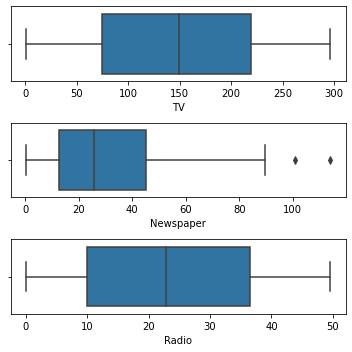

In [19]:

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()



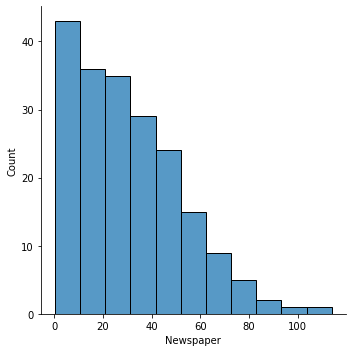

In [20]:
sns.displot(df['Newspaper'])


In [21]:

iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

lower_bridge = df["Newspaper"].quantile(0.25) - (iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)


-35.775000000000006
93.625


<AxesSubplot:xlabel='Newspaper'>

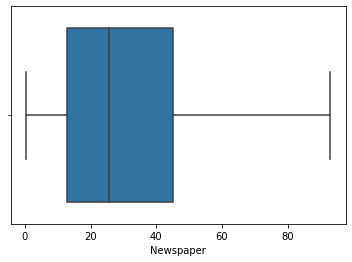

In [24]:
data = df.copy()
data.loc[data['Newspaper']>=93,  'Newspaper']=93
sns.boxplot(data['Newspaper'])



<AxesSubplot:xlabel='Sales'>

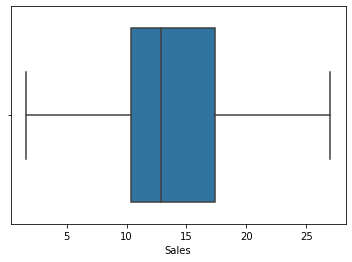

In [25]:
sns.boxplot(data['Sales'])

<AxesSubplot:xlabel='TV'>

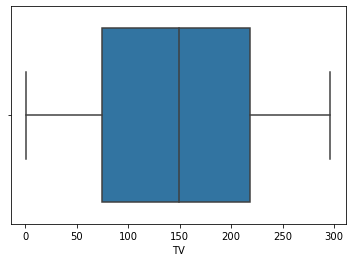

In [26]:
sns.boxplot(data['TV'])


<AxesSubplot:xlabel='Radio'>

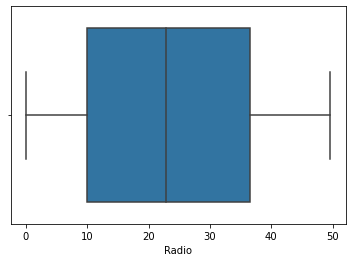

In [27]:
sns.boxplot(data['Radio'])



<AxesSubplot:xlabel='Newspaper'>

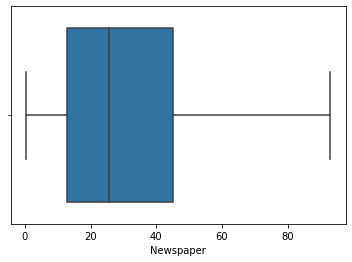

In [28]:
sns.boxplot(data['Newspaper'])


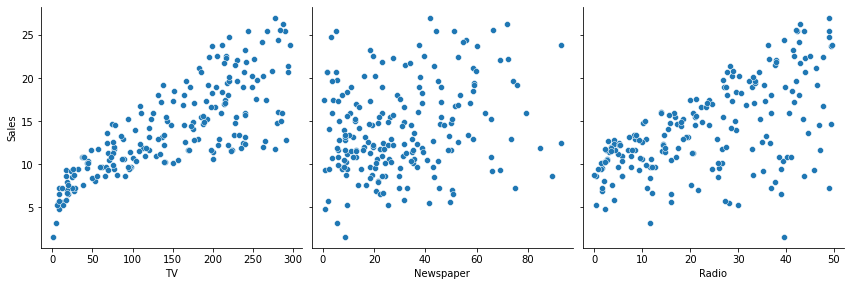

In [29]:
sns.pairplot(data, x_vars=['TV','Newspaper','Radio'],y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

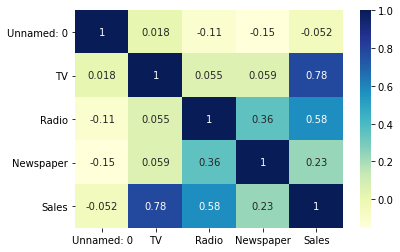

In [30]:
sns.heatmap(data.corr(), cmap="YlGnBu", annot= True)
plt.show()

In [31]:

importatnt_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)
print(importatnt_features)


['TV', 'Radio', 'Sales']


In [32]:

x = data['TV']
y = data['Sales']

In [33]:

x = x.values.reshape(-1,1)
x


array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [34]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [35]:
print(x.shape, y.shape)


(200, 1) (200,)


In [36]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)
print(x_train.shape,y_train.shape)

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
     


(134, 1) (134,)


In [37]:
knn = KNeighborsRegressor().fit(x_train,y_train)
knn

knn_train_pred = knn.predict(x_train)
knn_test_pred = knn.predict(x_test)
print(knn_train_pred,knn_test_pred)


[ 7.18 11.52 11.52 13.24 13.58 14.98 14.5  14.98 18.72 13.66  5.64 16.44
 13.54 14.98 15.84 20.16 21.92 17.58 10.74 10.46 19.02  9.64 18.82 19.8
 13.5  11.56  7.74 11.32 18.72 15.9  14.14 13.5  21.92 14.6   9.98 16.7
 13.66 15.48  6.06 11.32  7.18  5.64 15.84 21.92 13.9  18.76 11.2   5.64
 19.22 17.48 13.7   9.9  17.28 15.48 17.66 18.82 13.58 14.14  7.18 19.06
 13.66  7.94 18.76 16.8  16.02 15.54  7.22 19.8  20.14  7.22 14.26 11.56
  7.18 11.1  19.36 11.12 17.18 14.74 16.8   9.92 14.94 16.02 10.74 11.1
 14.58  9.84 13.4  13.9  17.66 11.12 19.2   9.98 19.64 17.54 14.32 14.5
  7.74  7.94 13.1   9.9  20.76 11.56 17.58 19.36 15.9  11.02 14.5  19.02
 13.9   9.98 13.54 10.74 13.46 20.16 16.04 16.02 17.28  9.92  9.98  5.64
 16.74 13.9  11.56 13.22  7.94 11.36 10.04 21.88 11.6  20.88 11.86  7.74
 17.28 13.66] [ 9.84 13.58 16.44 20.88 16.04 14.94 19.02 15.04  5.64 14.18 16.8  23.6
 17.54  8.58 14.08 10.24  9.92 18.82 20.72  5.64 11.34 13.22 11.56 14.18
 13.9  19.8  21.92 13.58 14.58 16.44 15.48

In [38]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])


In [39]:

r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbors","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)

R2: 0.5352120000907181
RMSE: 3.7127936063881006


In [40]:
Results.head()


,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.630248,0.535212,3.712794,0.095036


In [41]:
svr = SVR().fit(x_train,y_train)
svr


SVR()

In [42]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)
print(svr_train_pred,svr_test_pred)


[ 7.70188159 11.39881167 11.36218454 15.64872427 15.73296495 12.8010467
 13.21755545 12.88497716 16.36248647 13.49656785  7.47591775 16.14877253
 14.45131785 12.98729167 16.84984347 17.6476714  17.6331753  15.1655469
 10.12710639  9.07901358 17.7013172   9.51533691 17.65787414 17.74272408
 13.88125328 10.62386024  7.94180602 10.73242895 16.37731375 16.00064183
 14.79952324 13.87765092 17.53151136 13.38591242 11.75835751 17.14146916
 13.44875143 16.99392032  7.479445   10.84547004  7.69621421  7.46929443
 16.78881324 17.59774466 12.33020338 17.50706888 11.14895758  7.46421535
 16.41057685 15.01155721 14.12598433  9.63972092 17.16495602 16.75098268
 16.50582889 17.636441   15.73296495 14.82172823  7.67682416 17.38695711
 13.50757563  7.65552095 17.5384949  15.29789697 17.08438    16.91628183
  7.54938241 17.74287408 16.32530741  7.54748585 14.6191629  10.62960138
  7.67955153 11.57879073 16.25051592 10.19807557 15.07901543 13.34876776
 15.27515447  8.38132253 15.48052386 17.08438    10.0

In [43]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2_train,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2:",r2)
print("RMSE:",rmse)


R2: 0.6318286809952135
RMSE: 3.3044435019548923


In [44]:
Results.head()


,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbors,0.630248,0.535212,3.712794,0.095036
1,Support Vector Machine,0.545679,0.631829,3.304444,-0.086150


In [46]:
import statsmodels.api as sm
x_train_constant = sm.add_constant(x_train)
model = sm.OLS(y_train,x_train_constant).fit()
model.params



const    7.198421
x1       0.045262
dtype: float64

In [47]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     177.1
Date:                Mon, 31 Jul 2023   Prob (F-statistic):           3.70e-26
Time:                        18:24:14   Log-Likelihood:                -350.80
No. Observations:                 134   AIC:                             705.6
Df Residuals:                     132   BIC:                             711.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1984      0.580     12.421      0.0

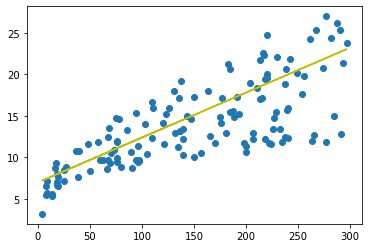

In [48]:

plt.scatter(x_train,y_train)
plt.plot(x_train,6.9955 + 0.0541 * x_train, 'y')
plt.show()


In [49]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res


172   -0.485553
107   -2.590091
46    -0.658408
96    -4.442161
9     -5.641737
         ...   
17     4.464897
37     4.120520
106   -1.129967
111    3.661792
67    -0.103395
Name: Sales, Length: 134, dtype: float64

In [50]:
y_train_pred


array([ 8.08555294, 11.29009127, 11.25840798, 16.1421606 , 16.24173665,
       12.67510359, 13.15940529, 12.77015346, 16.99308321, 13.4988691 ,
        7.57862032, 16.73509072, 14.6937817 , 12.88783425, 17.61317043,
       20.31077614, 20.35603798, 15.56733522, 10.26717366,  9.4615129 ,
       19.27880617,  9.8009767 , 19.09775881, 19.73142458, 13.97864461,
       10.65189931,  8.41143819, 10.73789681, 17.01118795, 16.55856954,
       15.12376918, 13.97411843, 20.61403047, 13.36308358, 11.61145034,
       18.02957936, 13.4400287 , 17.81232253,  7.59219887, 10.82842049,
        8.07650057,  7.55146321, 17.53169911, 20.45561403, 12.16817098,
       18.68587606, 11.07736061,  7.52883229, 17.0519236 , 15.38176168,
       14.28642513,  9.89602657, 18.06578884, 17.48191109, 17.16960439,
       19.02533986, 16.24173665, 15.15092629,  8.04481728, 18.44146212,
       13.51244765,  8.00860781, 18.758295  , 15.72575167, 17.94358187,
       17.70369411,  7.79587715, 19.72237221, 16.94782137,  7.79

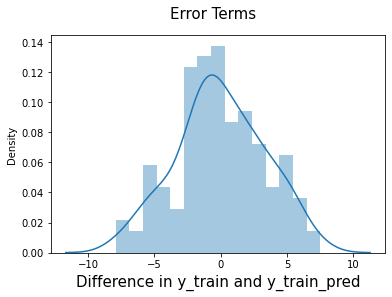

In [51]:

fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred', fontsize = 15)
plt.show()

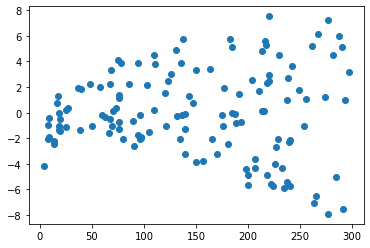

In [52]:
plt.scatter(x_train, res)
plt.show()

In [53]:

x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)
y_pred


array([ 9.1492062 , 16.20100099, 16.68530269, 19.90341957, 15.20976668,
       15.96563942, 19.21996578, 13.05530306,  7.23010414, 12.44879439,
       15.70312075, 20.03467891, 17.26465425,  8.4929095 , 15.0060884 ,
        9.61992934,  8.91837081, 19.08870644, 18.55461672,  7.4428348 ,
       11.14525338, 16.47709822, 10.5975851 , 12.30848268, 12.05954256,
       19.88078865, 20.48729732, 16.21005336, 12.63889412, 16.7396169 ,
       17.51812056, 18.05673647,  8.44312148,  9.22162514, 14.64399367,
       10.60663747,  8.62416884, 14.05558974, 14.95177419,  7.97692452,
       17.08360689, 13.59391896,  9.21257277, 13.54865712, 17.58601332,
        8.27565267, 16.04258455, 16.36394362,  7.72798439, 12.5031086 ,
       20.14330733, 11.74270967, 10.33054024,  9.14468001, 16.1421606 ,
        8.35712398, 18.45956685, 18.06578884, 14.58967946, 18.20610054,
       11.1950414 , 14.82051485, 14.7480959 ,  7.58767269,  9.74213631,
       16.91613808])

In [54]:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
np.sqrt(mean_squared_error(y_test,y_pred))


3.1181235324084526

In [55]:

r2 = r2_score(y_test,y_pred)
r2
     


0.6721766187376804

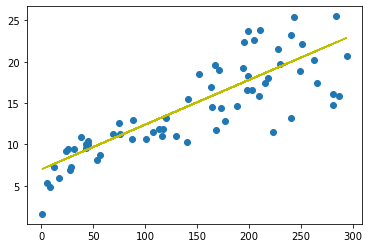

In [56]:
plt.scatter(x_test,y_test)
plt.plot(x_test,6.9955 + 0.0541 * x_test,'y')
plt.show()